#  DIRECTLY RUN EVERYTHING FROM HERE

In [93]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from PIL import ImageSequence
from tqdm import tqdm


# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

In [94]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [95]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [96]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

# Put the NAME of the original gif WITHOUT extension here!

In [107]:
orig_name = 'tomato'

# where the original gif is

In [105]:
img_folder = '../hq/'

# duration of the final gif

In [99]:
out_dur = 20

# DIRECTLY RUN EVERYTHING FROM HERE

In [100]:
def create_dir(outdir):
    """creates directory if it does not exist"""
    if not os.path.exists(os.path.dirname(outdir)):
        try:
            os.makedirs(os.path.dirname(outdir))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

In [108]:
gif_name = os.path.join(img_folder, '{}.gif'.format(orig_name))

def extractFrames(inGif, outFolder):
    frame = Image.open(inGif)
    nframes = 0
    while frame:
        create_dir('%s/%s-%s.gif' % (outFolder, os.path.basename(inGif), nframes))
        frame.save( '%s/%s-%s.gif' % (outFolder, os.path.basename(inGif), nframes ) , 'GIF')
        nframes += 1
        try:
            frame.seek( nframes )
        except EOFError:
            break;
    return True

frames_folder =  os.path.join(img_folder, '{}.gif'.format(orig_name))
extractFrames(gif_name, '../hq/{}/'.format(orig_name))

True

Processing 1 images
image                    shape: (480, 480, 3)         min:    0.00000  max:  249.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  142.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


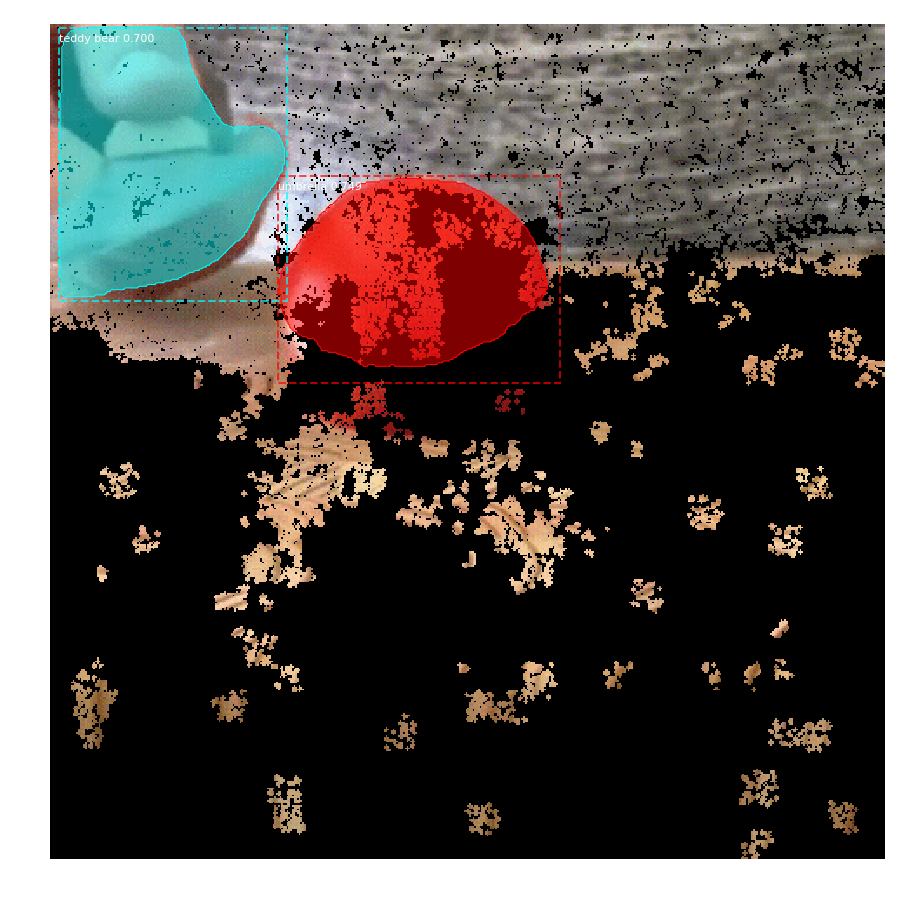

In [109]:
# Load a random image from the images folder
# file_names = next(os.walk(IMAGE_DIR))[2]
# image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

BLUEPRINTS_DIR = os.path.join(ROOT_DIR, "blueprints")
# file_name = ROOT_DIR + "/images/12283150_12d37e6389_z.jpg"
# image = skimage.io.imread(os.path.join(BLUEPRINTS_DIR, file_name))
image = skimage.io.imread('../hq/{}/{}.gif-{}.gif'.format(orig_name, orig_name, 16))
# image_name = file_name
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

storing the MRCNN result for each frame

In [67]:
all_results = []
all_images = []
for i in tqdm(range(len(os.listdir('../hq/{}/'.format(orig_name))))):
    image = skimage.io.imread('../hq/{}/{}.gif-{}.gif'.format(orig_name, orig_name, i))
    all_images.append(image)
    all_results.append(model.detect([image], verbose=0))

100%|██████████| 31/31 [00:30<00:00,  1.04it/s]


In [68]:
def get_segments(mask):
    h, w = mask.shape
    left, right = -1, -1
    segments = []
    
    for i in range(h):
        for j in range(w):
            if mask[i][j]:
                left = j
                break
        for j in range(w):
            if mask[i][w - 1 - j]:
                right = w - 1 - j
                break
        if left != -1 and right != -1:
            segments.append((i, left, right))

        left, right = -1, -1
    
    return segments


def get_max(segments):
    result = (-1, 0)
    for s in segments:
        if result[1] < s[2] - s[1]:
            result = (s[0], (s[2] - s[1]))
    
    return result


def get_contour(mask):
    mask = mask[:, :, 0]

    x_segments = get_segments(mask)
    y_segments = get_segments(mask.T)
    
    y_center = (x_segments[0][0] + x_segments[-1][0]) // 2
    x_center = (y_segments[0][0] + y_segments[-1][0]) // 2

    y_max = get_max(x_segments)
    x_max = get_max(y_segments)

#     print(x_center, y_center)
#     print(x_max)
#     print(y_max)
    
    tl, tr, bl, br = [-1, -1], [-1, -1], [-1, -1], [-1, -1]

    # set y lengths
    if (x_max[0] > x_center):  # longer vertical slice is on the right of center
        left = x_max[1]
        right = x_max[1] * 5 // 4
    else:  # otherwise
        left = x_max[1] * 5 // 4
        right = x_max[1]
    
    # set y boundaries
    tl[1] = y_center - left * 2 // 3
    tr[1] = y_center - right * 2 // 3
    bl[1] = y_center + left * 2 // 3
    br[1] = y_center + right * 2 // 3
    
    # set x lengths
    if (y_max[0] > y_center):  # longer horizontal slice is below center
        top = y_max[1]
        bottom = y_max[1] * 5 // 4
    else:  # otherwise
        top = y_max[1] * 5 // 4
        bottom = y_max[1]
    
    # set x boundaries
    tl[0] = x_center - top * 4 // 5
    tr[0] = x_center + top
    bl[0] = x_center - bottom * 4 // 5
    br[0] = x_center + bottom
    
    return [tl, tr, bl, br]

# contour = get_contour(mask)
# print(contour)

In [69]:
def get_background(img, mask):
    contour = get_contour(mask)
    rows, cols, ch = img.shape
    rmask, cmask, ch = mask.shape
    pts1 = np.float32([[0,0], [cols, 0], [0, rows], [cols, rows]])
    pts2 = np.float32(contour)
    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img, M, (cmask, rmask))

    return cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

# modify THIS block if object in gif is not car/truck

stitching faces onto frames in the original gif

the code block surrounded by heavy stroke comments could be modified based on what objects are detected by the MRCNN

In [88]:
all_out = []

for j, image in tqdm(enumerate(all_images)):
    image_out = image.copy()
#     img = cv2.imread('../hq/2.jpeg')
    r = all_results[j][0]
    count = 0
    for i, class_id in enumerate(r['class_ids']):
        ########### THIS COULD BE MODIFIED ###############
        if class_names[class_id] in ['car', 'truck']:  # edit here to change what objects to be replaced by faces
            count += 1
            img = cv2.imread('../hq/{}.jpeg'.format(2))  # edit here to change face images
        ########### MODIFICATION ENDS ####################
            mask = r['masks'][:, :, i]
            mask = np.stack([mask, mask, mask], axis=2)
            background = get_background(img, mask)
            image_out[mask] = background[mask]
            img_out = Image.fromarray(np.uint8(image_out))
            all_out.append(img_out)

31it [00:01, 24.85it/s]


save the animation

In [89]:
print(len(all_out))
# del all_out[17:20]
# del all_out[1]
# print(len(all_out))
# part_out = all_out[0::2]
part_out = all_out

print(len(part_out))
out_path = os.path.join(img_folder, '{}_out.gif'.format(orig_name))
part_out[0].save(out_path, format='GIF', append_images=part_out[1:], save_all=True, duration=our_dur, loop=0)


20
20
